In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 家電  

## MDコンポ

### 時刻別消費電力量
$$
E_{ Elc, audio_{ MicroSystem-with-MD }, d, t } =  
( P_{ Elc, audio_{ MicroSystem-with-MD }, listening } \times t_{ audio_{ MicroSystem-with-MD }, listening, d, t } +
P_{ Elc, audio_{ MicroSystem-with-MD }, standby } \times t_{ audio_{ MicroSystem-with-MD }, standby, d, t } ) 
\times 10^{ -3 }
$$

$ E_{ Elc, audio_{ MicroSystem-with-MD }, d, t } $：日付dの時刻tにおける消費電力量,kWh  
$ P_{ Elc, audio_{ MicroSystem-with-MD }, listening } $：聴取時の消費電力,W  
$ t_{ audio_{ MicroSystem-with-MD }, listening, d, t } $：日付dの時刻tにおける聴取時間,h  
$ P_{ Elc, audio_{ MicroSystem-with-MD }, standby } $：待機時の消費電力,W  
$ t_{ audio_{ MicroSystem-with-MD }, standby, d, t } $：日付dの時刻tにおける待機時間,h  
$ 10^{ -3 } $：単位換算,Wh -> kWh

In [2]:
def get_E_Elc_audio_microsystem_with_md_d_t( \
        P_Elc_audio_microsystem_with_md_rtd, \
        P_Elc_audio_microsystem_with_md_standby_rtd, \
        t_audio_microsystem_with_md_listening_d_t, \
        t_audio_microsystem_with_md_standby_d_t):
    """時刻別消費電力量を計算する
    
    Parameters
    ----------
    P_Elc_audio_microsystem_with_md_rtd : float
        定格消費電力, W
        
    P_Elc_audio_microsystem_with_md_standby_rtd : float
        待機時の定格消費電力, W
        
    t_audio_microsystem_with_md_listening_d_t : ndarray(N-dimensional array)
        1年間の全時間の聴取時間を格納したND配列, h
        d日t時の聴取時間が年開始時から8760個連続して格納されている
    
    t_audio_microsystem_with_md_standby_d_t : ndarray(N-dimensional array)
        1年間の全時間の待機時間を格納したND配列, h
        d日t時の待機時間が年開始時から8760個連続して格納されている

    Returns
    ----------
    E_Elc_audio_microsystem_with_md_d_t : ndarray(N-dimensional array)
        1年間の全時間の消費電力量を格納したND配列, Wh
        d日t時の消費電力量が年開始時から8760個連続して格納されている
    """
    
    P_Elc_audio_microsystem_with_md_listening = get_P_Elc_audio_microsystem_with_md_listening(P_Elc_audio_microsystem_with_md_rtd)
    P_Elc_audio_microsystem_with_md_standby = get_P_Elc_audio_microsystem_with_md_standby(P_Elc_audio_microsystem_with_md_standby_rtd)
    
    E_Elc_audio_microsystem_with_md_d_t \
        = P_Elc_audio_microsystem_with_md_listening * t_audio_microsystem_with_md_listening_d_t \
        + P_Elc_audio_microsystem_with_md_standby * t_audio_microsystem_with_md_standby_d_t
        
    E_Elc_audio_microsystem_with_md_d_t = E_Elc_audio_microsystem_with_md_d_t * 10**(-3)
    
    return E_Elc_audio_microsystem_with_md_d_t

### 動作別の消費電力

#### 聴取時の消費電力  
$$
P_{ Elc, audio_{ MicroSystem-with-MD }, listening } =　0.4 \times P_{ Elc, audio_{ MicroSystem-with-MD }, rtd }
$$

$ P_{ Elc, audio_{ MicroSystem-with-MD }, rtd } $：定格消費電力,W

In [3]:
def get_P_Elc_audio_microsystem_with_md_listening(P_Elc_audio_microsystem_with_md_rtd):
    """聴取時の消費電力を計算する
    
    Parameters
    ----------
    P_Elc_audio_microsystem_with_md_rtd : float
        定格消費電力, W

    Returns
    ----------
    P_Elc_audio_microsystem_with_md_listening : float
        聴取時消費電力, W
    """
        
    P_Elc_audio_microsystem_with_md_listening = \
        0.4 * P_Elc_audio_microsystem_with_md_rtd
        
    return P_Elc_audio_microsystem_with_md_listening

#### 待機時の消費電力  
$$
P_{ Elc, audio_{ MicroSystem-with-MD }, standby } = P_{ Elc, audio_{ MicroSystem-with-MD }, standby, rtd }
$$

$ P_{ Elc, audio_{ MicroSystem-with-MD }, standby, rtd } $：待機時の定格消費電力,W

In [4]:
def get_P_Elc_audio_microsystem_with_md_standby(P_Elc_audio_microsystem_with_md_standby_rtd):
    """待機時の消費電力を計算する
    
    Parameters
    ----------
    P_Elc_audio_microsystem_with_md_standby_rtd : float
        定格消費電力, W

    Returns
    ----------
    P_Elc_audio_microsystem_with_md_standby : float
        聴取時消費電力, W
    """
        
    P_Elc_audio_microsystem_with_md_standby = \
        P_Elc_audio_microsystem_with_md_standby_rtd
        
    return P_Elc_audio_microsystem_with_md_standby

## サンプル計算

### 家電スケジュールの読み込み
ここでは、サンプルデータをcsvファイルから読み込む

In [5]:
def import_schedule_1_d_t() -> np.ndarray:
    """家電スケジュールを外部CSVファイルからND配列に読み込む
    
    Returns
    ----------
    E_Elc_tv_led_d_t : ndarray(N-dimensional array)
        1年間の全時間の家電スケジュールを格納したND配列
        d日t時の家電スケジュールが年開始時から8760個連続して格納されている
    """
    
    df = pd.read_csv('HEA_schedule_sample.csv', encoding='SHIFT_JIS')
    ds = df['MDコンポ_4人世帯_聴取']
    schedule_1_d_t = ds.values
    return schedule_1_d_t

In [6]:
def import_schedule_2_d_t() -> np.ndarray:
    """家電スケジュールを外部CSVファイルからND配列に読み込む
    
    Returns
    ----------
    E_Elc_tv_led_d_t : ndarray(N-dimensional array)
        1年間の全時間の家電スケジュールを格納したND配列
        d日t時の家電スケジュールが年開始時から8760個連続して格納されている
    """
    
    df = pd.read_csv('HEA_schedule_sample.csv', encoding='SHIFT_JIS')
    ds = df['MDコンポ_4人世帯_待機']
    schedule_2_d_t = ds.values
    return schedule_2_d_t

#### 視聴時の消費電力

In [7]:
get_P_Elc_audio_microsystem_with_md_listening(28)

11.200000000000001

#### 待機時の消費電力

In [8]:
get_P_Elc_audio_microsystem_with_md_standby(0.2)

0.2

### 時刻別消費電力量

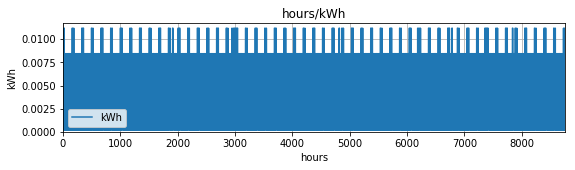

In [9]:
t_audio_microsystem_with_md_listening_d_t = import_schedule_1_d_t()
t_audio_microsystem_with_md_standby_d_t = import_schedule_2_d_t()

x = np.arange(8760)
y = get_E_Elc_audio_microsystem_with_md_d_t(28, 0.2, t_audio_microsystem_with_md_listening_d_t, t_audio_microsystem_with_md_standby_d_t)

plt.figure(figsize=(9,2))
plt.subplot(1,1,1)
plt.plot(x, y, label="kWh")

plt.grid(True)

plt.title("hours/kWh")
plt.xlabel("hours")
plt.ylabel("kWh")

plt.xlim(0,8760)
plt.ylim(0,)

plt.legend()
plt.show()

### 省エネ基準との比較用時刻別消費電力量の書き出し

In [10]:
t_audio_microsystem_with_md_listening_d_t = import_schedule_1_d_t()
t_audio_microsystem_with_md_standby_d_t = import_schedule_2_d_t()

dat = get_E_Elc_audio_microsystem_with_md_d_t(28, 0.2, t_audio_microsystem_with_md_listening_d_t, t_audio_microsystem_with_md_standby_d_t)

np.savetxt('tmp.csv',dat,delimiter=',',fmt = " %s ")